# 🚀 **EV Market Segmentation & Customer Insights using Machine Learning** ⚡

## 📌 Objective

In the rapidly growing **Electric Vehicle (EV) market**, understanding customer preferences and behaviors is **crucial for business success**.  
This notebook aims to perform **data-driven market segmentation** by leveraging:  

- ✔ **Customer reviews & ratings** 📝 ⭐  
- ✔ **Aspect-based sentiment analysis** 🔍  
- ✔ **Text embeddings from Transformer models** 🤖  
- ✔ **Clustering techniques (K-Means, GMM, t-SNE for visualization)** 📊  

By uncovering **hidden customer segments**, this analysis will help **EV manufacturers, marketers, and strategists** **design targeted campaigns, improve product features, and optimize customer experience.**  

---

## 🔑 **Key Questions Addressed**
✅ **What are the key factors influencing EV purchasing decisions?**  
✅ **How can we segment customers based on their preferences and experiences?**  
✅ **What actionable insights can businesses gain from these segments?**  

---

## 🛠️ **Approach & Techniques**
1️⃣ **Exploratory Data Analysis (EDA)** to uncover patterns in customer feedback  
2️⃣ **Data Preprocessing & Feature Engineering** (Handling missing values, encoding categorical variables, extracting text embeddings)  
3️⃣ **Sentiment Analysis & Topic Modeling** (Using **BART**, **BERTopic**) to derive insights from textual reviews  
4️⃣ **Clustering & Market Segmentation** (**K-Means, GMM**)  
5️⃣ **Cluster Profiling & Business Insights** (Understanding each segment for targeted marketing)  

---

This notebook is designed to provide **data-driven recommendations** for businesses to **enhance customer experience, refine marketing strategies, and optimize EV features**. 🌍⚡🚗  

### **Let’s dive in!** 🔍📊🚀  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
BASE_DIR = "/content"
df_name = "2-wheeler-EV-bikewale - user reviews.csv"
df = pd.read_csv(os.path.join(BASE_DIR, df_name))

In [12]:
df.head(3)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube


In [13]:
df.describe()

,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
count,844.000000,739.000000,716.000000,345.000000,703.000000,185.000000,530.000000,180.000000,390.000000
mean,3.363744,3.779432,3.314246,3.527536,3.145092,2.935135,3.664151,3.394444,3.382051
std,1.689873,1.350021,1.585024,1.507721,1.637871,1.630587,1.387371,1.392306,1.510949
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


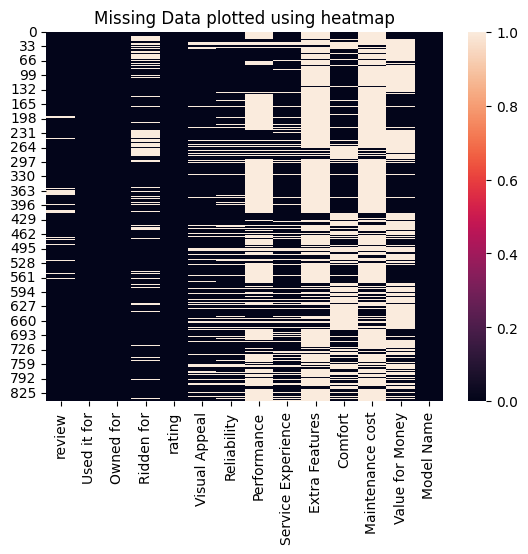

In [15]:
plt.title("Missing Data plotted using heatmap")
sns.heatmap(df.isnull())
plt.show()

In [16]:
print("Percentage of missing data in each column")
percent_missing = df.isnull().sum()/df.shape[0]*100
percent_missing

Percentage of missing data in each column


,0
review,5.568720
Used it for,0.000000
Owned for,0.000000
Ridden for,20.853081
rating,0.000000
Visual Appeal,12.440758
Reliability,15.165877
Performance,59.123223
Service Experience,16.706161
Extra Features,78.080569


# 1. Basic EDA before Preprocessing

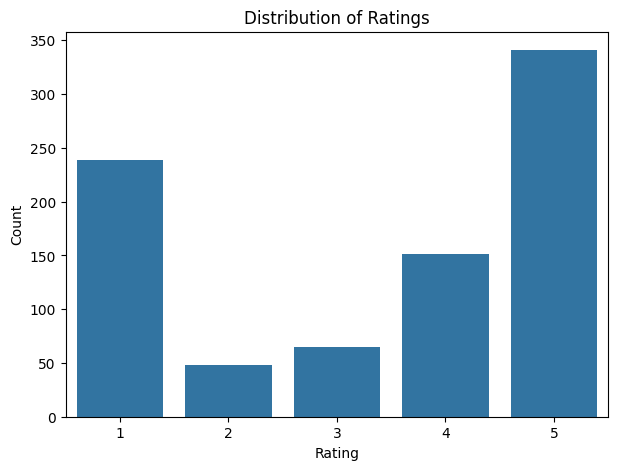

In [17]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df["rating"])
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

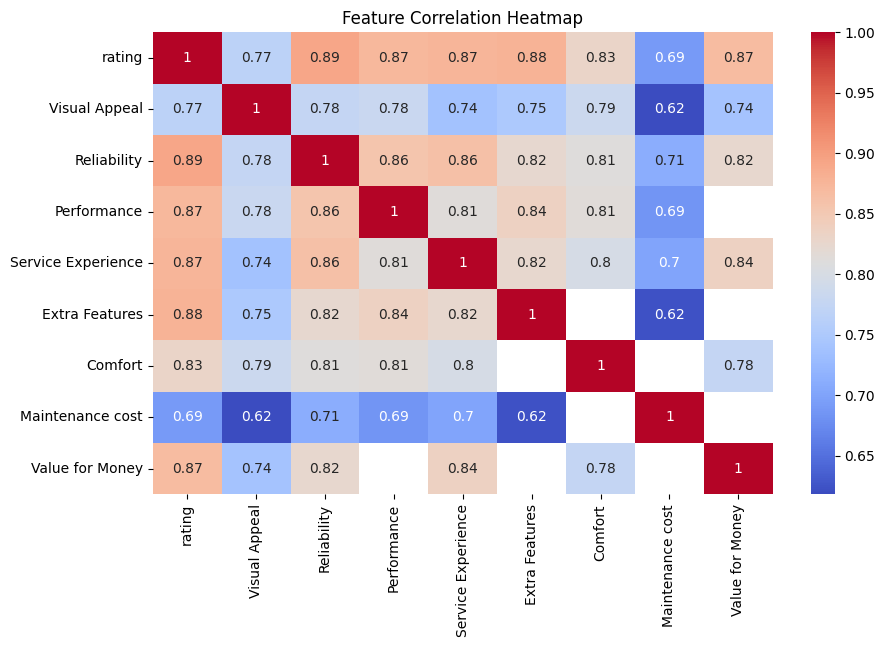

In [18]:
cat_feats = [col for col in df.columns if df[col].dtype=='O']
num_feats = [col for col in df.columns if col not in cat_feats]
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_feats].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

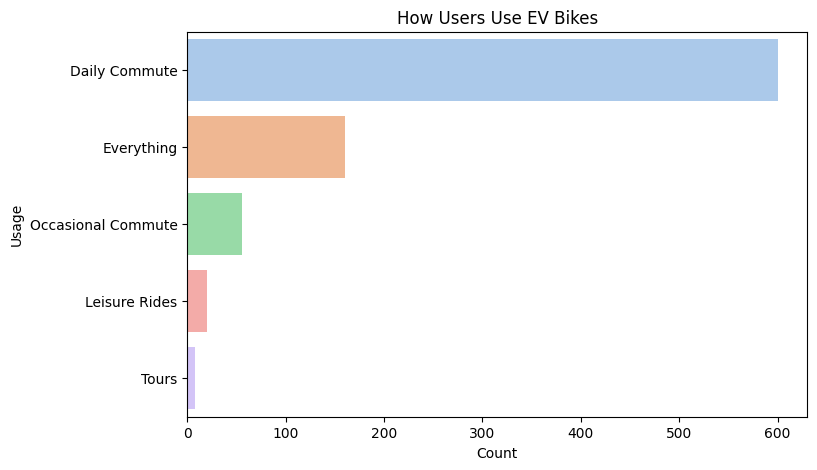

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df["Used it for"], palette="pastel", order=df["Used it for"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Usage")
plt.title("How Users Use EV Bikes")
plt.show()

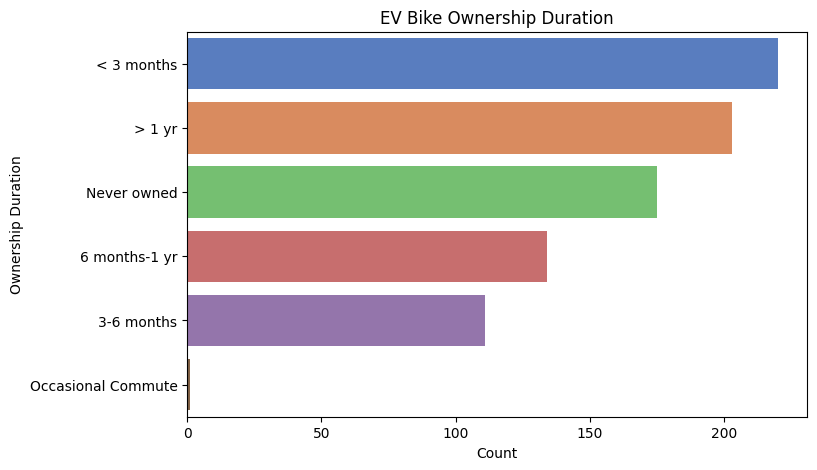

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df["Owned for"], palette="muted", order=df["Owned for"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Ownership Duration")
plt.title("EV Bike Ownership Duration")
plt.show()

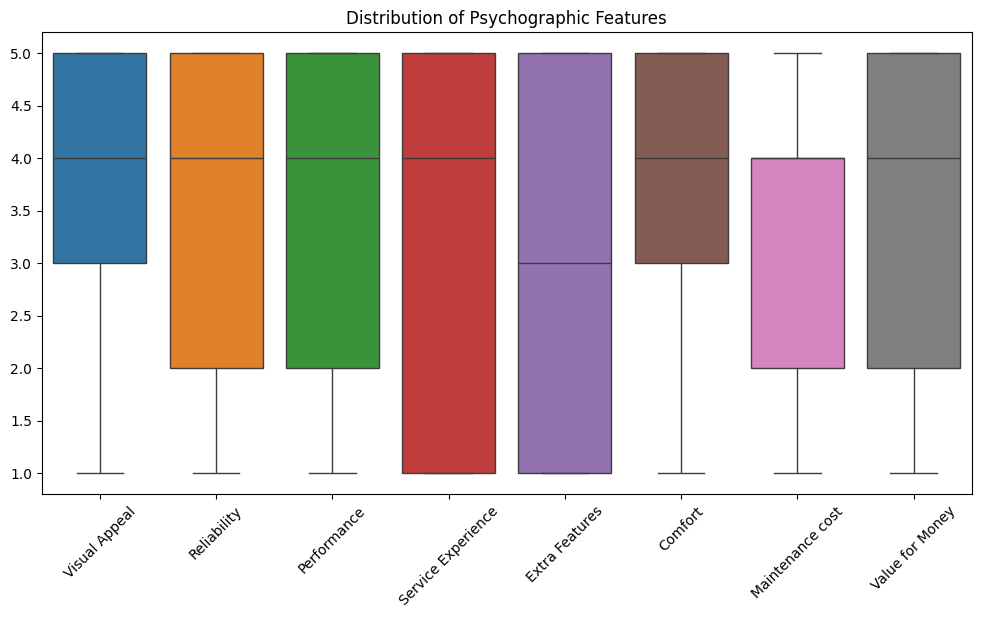

In [21]:
# Select only numeric psychographic features
psychographic_features = ["Visual Appeal", "Reliability", "Performance",
                          "Service Experience", "Extra Features", "Comfort",
                          "Maintenance cost", "Value for Money"]

# Plot boxplots to check distribution
plt.figure(figsize=(12, 6))
sns.boxplot(df[psychographic_features])
plt.xticks(rotation=45)
plt.title("Distribution of Psychographic Features")
plt.show()

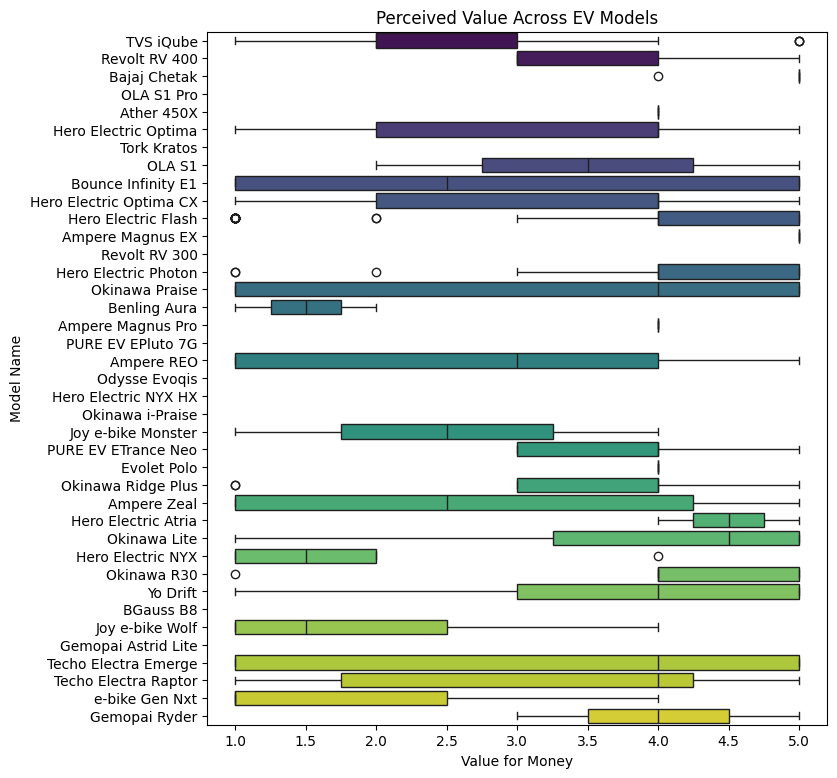

In [22]:
plt.figure(figsize=(8, 9))
sns.boxplot(x=df["Value for Money"], y=df["Model Name"], palette="viridis")
plt.xlabel("Value for Money")
plt.ylabel("Model Name")
plt.title("Perceived Value Across EV Models")
plt.show()

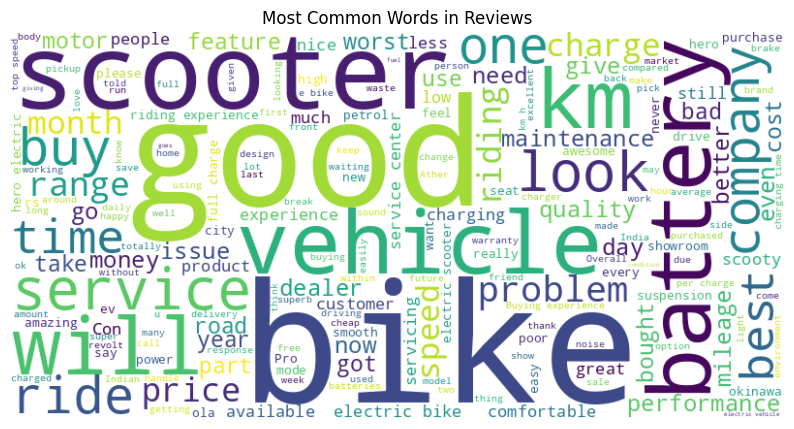

In [23]:
# Combine all reviews
text = " ".join(df["review"].dropna())

# Generate word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

# Performing basic sentiment analysis of the reviews

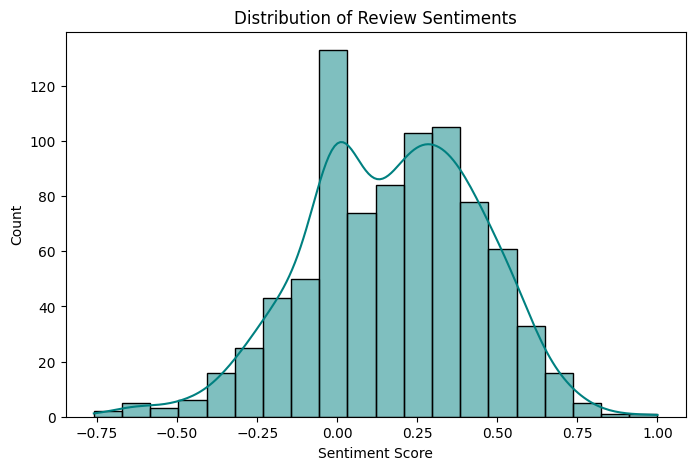

In [24]:
# Function to get sentiment score
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df["sentiment_score"] = df["review"].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["sentiment_score"], bins=20, kde=True, color="teal")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.title("Distribution of Review Sentiments")
plt.show()

# 2. Data Cleaning & Preprocessing

1. Handle missing values
2. Convert categorical variables into meaningful numerical representations (e.g., One-Hot Encoding or Label Encoding)
3. Standardize numerical features for clustering

In [25]:
# Drop columns with excessive missing values (>75%)
df = df.drop(columns=["Extra Features", "Maintenance cost"])

In [26]:
# Fill missing values for numerical psychographic features with median
psychographic_features = ["Visual Appeal", "Reliability", "Performance",
                          "Service Experience", "Comfort", "Value for Money"]
df[psychographic_features] = df[psychographic_features].apply(lambda x: x.fillna(x.median()))

In [27]:
# Drop rows where 'review' or 'rating' is missing
df = df.dropna(subset=["review", "rating"])

In [28]:
print("For rows where ridden for column is NaN, all except 1 row correspond to Never Owned")
df[df['Ridden for'].isnull()]["Owned for"].value_counts()

For rows where ridden for column is NaN, all except 1 row correspond to Never Owned


,count
Owned for,
Never owned,159
> 1 yr,1


In [29]:
df['Ridden for'].value_counts()

,count
Ridden for,
< 5000 kms,436
5000-10000 kms,134
> 15000 kms,37
10000-15000 kms,29
Never owned,1


In [30]:
df['Owned for'].value_counts()

,count
Owned for,
< 3 months,206
> 1 yr,196
Never owned,159
6 months-1 yr,129
3-6 months,106
Occasional Commute,1


In [31]:
df.loc[df['Ridden for'].isna() & (df['Owned for'] == 'Never owned'), 'Ridden for'] = 'Never owned'

In [32]:
most_common_ridden = df[df['Owned for'] == '> 1 yr']['Ridden for'].mode()[0]
df.loc[df['Ridden for'].isna(), 'Ridden for'] = most_common_ridden

In [33]:
df['Ridden for'].value_counts()

,count
Ridden for,
< 5000 kms,437
Never owned,160
5000-10000 kms,134
> 15000 kms,37
10000-15000 kms,29


In [34]:
# Check if missing values are handled
df.isnull().sum()/df.shape[0]

,0
review,0.0
Used it for,0.0
Owned for,0.0
Ridden for,0.0
rating,0.0
Visual Appeal,0.0
Reliability,0.0
Performance,0.0
Service Experience,0.0
Comfort,0.0


In [35]:
df['Used it for'].value_counts()

,count
Used it for,
Daily Commute,573
Everything,145
Occasional Commute,53
Leisure Rides,18
Tours,8


In [36]:
print("Number of unique models in the dataset:")
df['Model Name'].nunique()

Number of unique models in the dataset:


39

In [37]:
# Ordinal encoding for 'Owned for'
owned_for_order = ['Never owned', '< 3 months', '3-6 months', '6 months-1 yr', '> 1 yr']
df['Owned for'] = pd.Categorical(df['Owned for'], categories=owned_for_order, ordered=True).codes

In [38]:
# Ordinal encoding for 'Ridden for'
ridden_for_order = ['Never owned', '< 5000 kms', '5000-10000 kms', '10000-15000 kms', '> 15000 kms']
df['Ridden for'] = pd.Categorical(df['Ridden for'], categories=ridden_for_order, ordered=True).codes

In [39]:
le = LabelEncoder()
categorical_cols = ["Used it for", "Model Name"]
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [40]:
df.head(3)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name,sentiment_score
0,We all checked the bike's capacity to be 150 k...,0,0,0,1,3.0,4.0,4.0,4.0,4.0,1.0,33,0.131250
1,Performance is very poor on this bike. The cha...,1,4,1,1,3.0,1.0,4.0,1.0,3.0,3.0,33,-0.192143
2,I purchased this in April 2022 and the sales s...,0,1,1,3,4.0,4.0,4.0,2.0,5.0,2.0,33,0.247727


In [41]:
# Normalize psychographic & behavioral features
scaler = MinMaxScaler()
scaled_columns = ["Used it for", "Owned for", "Ridden for", "Visual Appeal", "Reliability", "Performance",
                  "Service Experience", "Comfort", "Value for Money",
                  "rating", "sentiment_score"]

df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Verify scaling
df.head(3)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name,sentiment_score
0,We all checked the bike's capacity to be 150 k...,0.00,0.2,0.00,0.0,0.50,0.75,0.75,0.75,0.75,0.00,33,0.506392
1,Performance is very poor on this bike. The cha...,0.25,1.0,0.25,0.0,0.50,0.00,0.75,0.00,0.50,0.50,33,0.322646
2,I purchased this in April 2022 and the sales s...,0.00,0.4,0.25,0.5,0.75,0.75,0.75,0.25,1.00,0.25,33,0.572572


In [42]:
df.reset_index(drop=True, inplace=True)

# Convert Reviews into Dense Embeddings.

**Why? This allows us to represent each review as a meaningful vector capturing sentiment and themes.**

In [43]:
from sentence_transformers import SentenceTransformer

# Load pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert reviews to embeddings
df["review_embedding"] = list(model.encode(df["review"].astype(str), convert_to_numpy=True))

# Convert embeddings into separate numerical columns
embeddings_df = pd.DataFrame(df["review_embedding"].tolist())

Result: Each review is now a dense 384-dimensional vector, ready for clustering and analysis.

In [44]:
embeddings_df.shape

(797, 384)

Extract Customer Priorities with Topic Modeling.
Instead of treating all reviews the same, we cluster them into meaningful topics using BERTopic.

In [49]:
# 📌 Step 1: Import Required Libraries
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN

# 📌 Step 2: Text Preprocessing Function
def clean_text(text):
    """Removes stopwords, special characters, and lowercases the text."""
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# 📌 Step 3: Apply Preprocessing to the Dataset
df["cleaned_review"] = df["review"].astype(str).apply(clean_text)

# 📌 Step 4: Define UMAP Model (Dimensionality Reduction)
umap_model = UMAP(n_neighbors=15, min_dist=0.1, n_components=5, metric='cosine')

# 📌 Step 5: Define HDBSCAN Model (Clustering)
hdbscan_model = HDBSCAN(min_cluster_size=5, cluster_selection_epsilon=0.1, prediction_data=True)

# 📌 Step 6: Define Vectorizer Model (Capture Word Combinations)
vectorizer_model = CountVectorizer(ngram_range=(1, 2))  # 1-grams & 2-grams for better context

# 📌 Step 7: Initialize & Train BERTopic Model
topic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    min_topic_size=5,  # Allow more granular topics
    calculate_probabilities=True
)

# 📌 Step 8: Fit BERTopic on Cleaned Reviews
topics, probs = topic_model.fit_transform(df["cleaned_review"])

# Store the topic in the DataFrame
df['Topic'] = topics

# View topic insights
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,388,-1_good_bike_scooter_service,"[good, bike, scooter, service, vehicle, batter...",[booked ola just test ride paying advance 500 ...
1,0,57,0_bike_service_battery_months,"[bike, service, battery, months, dealer, probl...",[brought ampere zeal july 2020 october 2020 gi...
2,1,46,1_service_vehicle_customer_delivery,"[service, vehicle, customer, delivery, booking...",[vehicle driving experience good issues associ...
3,2,33,2_bike_good_riding_like,"[bike, good, riding, like, nice, amazing, ride...",[bike useful daily use design bike amazing col...
4,3,25,3_bike_pollution_good_electric bike,"[bike, pollution, good, electric bike, bikes, ...",[wow mind blowing bike really like bike excell...
5,4,23,4_okinawa_praise_okinawa praise_battery,"[okinawa, praise, okinawa praise, battery, com...",[taking test ride hero tunwal felt okinawa pra...
6,5,23,5_good_experience_looks_riding,"[good, experience, looks, riding, buying exper...",[buying smooth riding ok low suspension fiber ...
7,6,21,6_scooter_best_electric_scooter best,"[scooter, best, electric, scooter best, good, ...",[best scooter buy today s high petrol pricing ...
8,7,20,7_scooter_nice_scooty_like,"[scooter, nice, scooty, like, cool, want, elec...",[nice scooter sitting little bit low specially...
9,8,20,8_km_speed_scooter_charge,"[km, speed, scooter, charge, kms, speedometer,...",[speed km true claim purchased ridge feb 2019 ...


What this does:
✔ Groups similar reviews into clusters of concerns.
✔ Helps us discover common themes among customers.



Each segment can be profiled based on concerns, allowing companies to target users with specific improvements.

In [50]:
from transformers import pipeline

# Load Zero-Shot Classification Model
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define Psychographic Aspects
aspects = ["Battery Life", "Performance", "Comfort", "Charging Issues", "Maintenance Cost", "Customer Service"]

# Classify each review
df['Aspect'] = df['review'].apply(lambda x: classifier(x, aspects)['labels'][0] if x else None)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Sentiment Analysis (Aspect-Based)

Instead of general sentiment analysis, we classify reviews into psychographic categories like:

Performance

Comfort

Reliability

Value for Money

Charging Infrastructure

💡 Zero-Shot Classification Approach (Facebook’s BART Model)

 How this helps segmentation?

Customers can be grouped based on their most frequent concerns & interests.

Companies can tailor their messaging & features to address these.


In [51]:
df.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Comfort', 'Value for Money', 'Model Name', 'sentiment_score',
       'review_embedding', 'Topic', 'cleaned_review', 'Aspect'],
      dtype='object')

# Concatenating all the important variables to prepare for clustering

The embeddings are merged with the orginal dataframe, along with the aspect based sentiment analysis results.

Merging embeddings and sentiment analysis results ensures rich, contextual customer segmentation. It enables the clustering model to go beyond numerical ratings, understand customer concerns, and derive actionable insights for marketing and product improvements.

In [52]:
# Select features for clustering
selected_features = [
    'rating', 'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
    'Comfort', 'Value for Money', 'Owned for', 'Ridden for', 'Model Name', 'Owned for', 'sentiment_score'
]

# We’ll need to one-hot encode the 'Aspect' column, as it's categorical
aspect_dummies = pd.get_dummies(df['Aspect'], prefix='Aspect')

# Combine all features into our final clustering dataset
df_clustering = pd.concat([df[selected_features], aspect_dummies], axis=1)

# Normalizing the combined dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clustering[df_clustering.columns] = scaler.fit_transform(df_clustering[df_clustering.columns])

X = pd.concat([embeddings_df, df_clustering], axis=1)

In [53]:
X.shape

(797, 402)

In [54]:
X.columns = X.columns.astype(str)

# Finding optimal K value using Elbow method and Silhouette scores

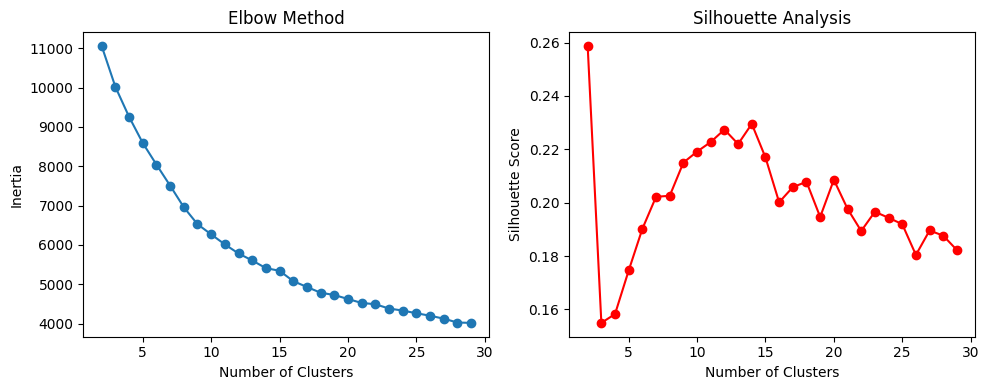

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Finding optimal K using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 30)  # Trying cluster sizes from 2 to 30

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

# K-Means Clustering

In [56]:
optimal_k = 12  # Choose based on the Elbow and Silhouette method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Gaussian Mixture Model Clustering

In [57]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['GMM Cluster'] = gmm.fit_predict(X)

# PCA for visualization

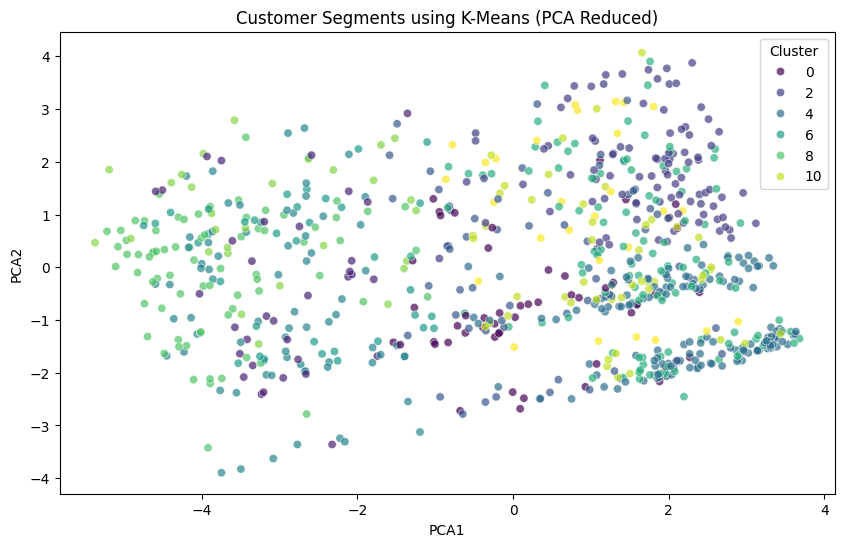

In [58]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', alpha=0.7)
plt.title('Customer Segments using K-Means (PCA Reduced)')
plt.show()

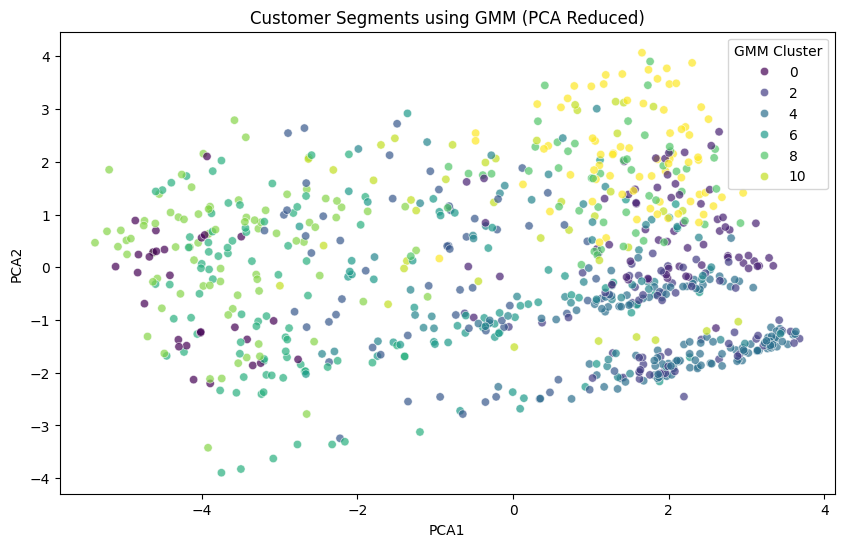

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM Cluster', data=df, palette='viridis', alpha=0.7)
plt.title('Customer Segments using GMM (PCA Reduced)')
plt.show()

# T-SNE for visualization

t-SNE is used for visualization. Unlike PCA, it effectively separates overlapping clusters by preserving local structures.

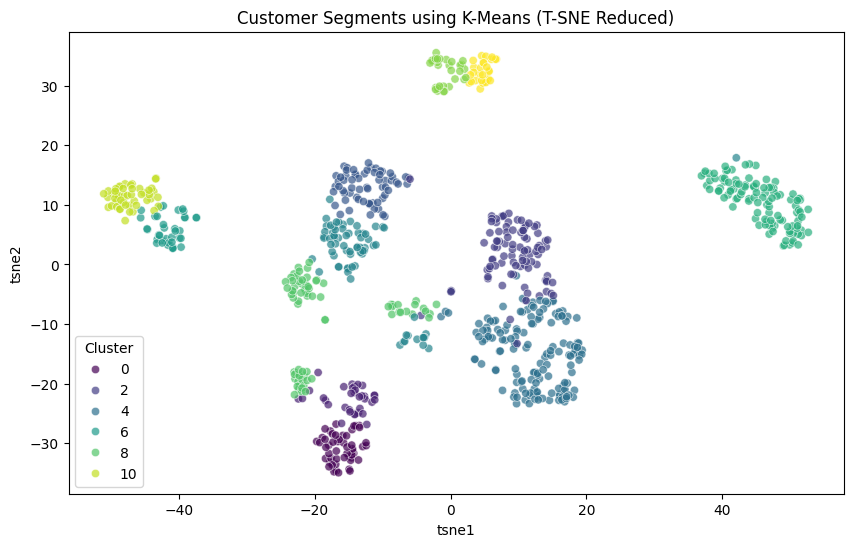

In [60]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, perplexity=30).fit_transform(X)

df['tsne1'] = X_tsne[:, 0]
df['tsne2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne1', y='tsne2', hue='Cluster', data=df, palette='viridis', alpha=0.7)
plt.title('Customer Segments using K-Means (T-SNE Reduced)')
plt.show()

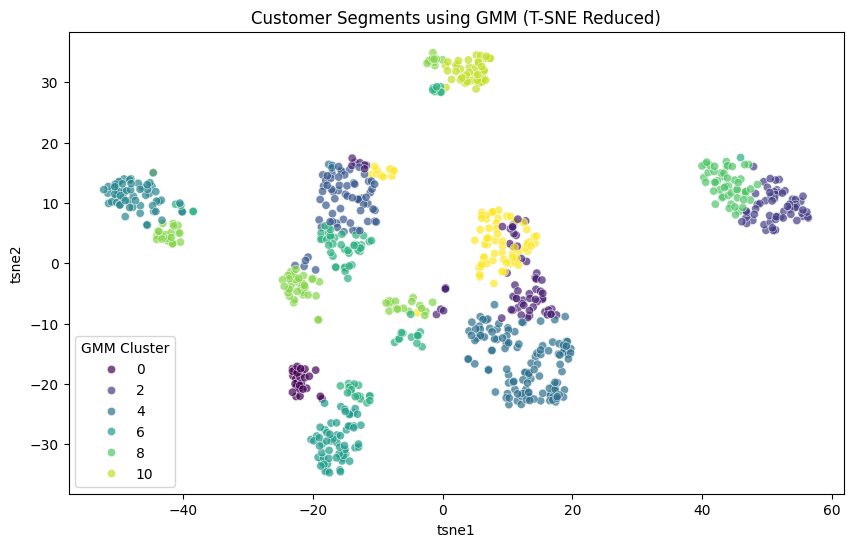

In [61]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, perplexity=30).fit_transform(X)

df['tsne1'] = X_tsne[:, 0]
df['tsne2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne1', y='tsne2', hue='GMM Cluster', data=df, palette='viridis', alpha=0.7)
plt.title('Customer Segments using GMM (T-SNE Reduced)')
plt.show()

# Profiling Segments

To understand different customer segments, we compute the average feature values for each cluster.

In [62]:
cluster_summary = df.groupby('Cluster')[
    ['rating', 'Visual Appeal', 'Performance', 'Service Experience', 'Comfort', 'Value for Money', 'Reliability', 'Service Experience']
].mean()

print(cluster_summary)

           rating  Visual Appeal  Performance  Service Experience   Comfort  \
Cluster                                                                       
0        0.583333       0.813725     0.750000            0.666667  0.735294   
1        0.080882       0.404412     0.323529            0.088235  0.632353   
2        0.901042       0.893229     0.833333            0.867188  0.841146   
3        0.638889       0.805556     0.773810            0.730159  0.789683   
4        0.858333       0.860000     0.801667            0.778333  0.826667   
5        0.038194       0.319444     0.204861            0.055556  0.600694   
6        0.067568       0.527027     0.628378            0.175676  0.432432   
7        0.860619       0.831858     0.785398            0.785398  0.796460   
8        0.036667       0.246667     0.750000            0.050000  0.176667   
9        0.100000       0.391667     0.525000            0.108333  0.500000   
10       0.817708       0.880208     0.776042       

Based on feature analysis, we assign meaningful business labels to each cluster to aid in targeted marketing.

Understanding how each customer segment perceives value allows businesses to tailor their marketing strategies.

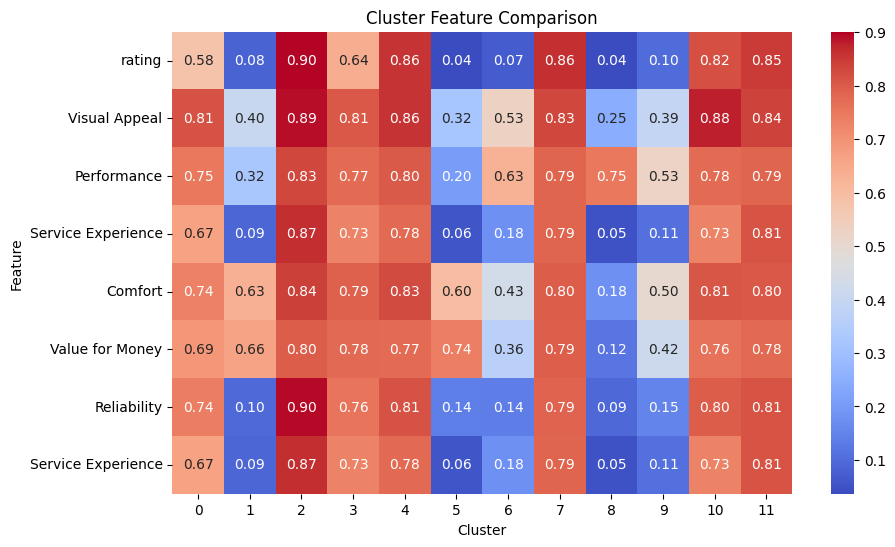

In [63]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cluster Feature Comparison")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()

# 🚗⚡ Product-Based Segmentation for EV Market  

Yes, **product-based segmentation** can also be done! While **customer-based segmentation** focuses on **user behaviors, preferences, and sentiments**, **product-based segmentation** clusters **EV models based on their attributes, performance, and customer perception**.  

## 🎯 Why Product-Based Segmentation?  
🔹 **Identifies strengths & weaknesses** of each EV model  
🔹 **Allows benchmarking** different EV models based on features and user feedback  
🔹 **Helps manufacturers & marketers** understand how each EV model is perceived  
🔹 **Supports competitive positioning** and feature enhancement  


In [65]:
# Group data by EV model and compute mean scores for key features
product_df = df.groupby('Model Name').agg({
    'rating': 'mean',
    'Visual Appeal': 'mean',
    'Performance': 'mean',
    'Service Experience': 'mean',
    'Comfort': 'mean',
    'Value for Money': 'mean',
    'Reliability': 'mean',
    'sentiment_score': 'mean',  # Derived from sentiment analysis
    'Topic': lambda x: x.mode()[0] if not x.mode().empty else None  # Most common topic
}).reset_index()


Since we have customer reviews for different EV models, we need to aggregate ratings, sentiment scores, and other features at the model level.

In [66]:
product_df

,Model Name,rating,Visual Appeal,Performance,Service Experience,Comfort,Value for Money,Reliability,sentiment_score,Topic
0,0,0.741071,0.785714,0.687500,0.678571,0.758929,0.758929,0.696429,0.578387,-1
1,1,0.522727,0.625000,0.579545,0.534091,0.750000,0.750000,0.647727,0.521916,-1
2,2,0.395833,0.562500,0.718750,0.343750,0.541667,0.520833,0.479167,0.460882,-1
3,3,0.461538,0.711538,0.634615,0.480769,0.634615,0.653846,0.557692,0.481983,-1
4,4,0.666667,0.758333,0.775000,0.658333,0.716667,0.750000,0.733333,0.602074,-1
5,5,0.500000,0.562500,0.562500,0.562500,0.750000,0.750000,0.562500,0.473930,-1
6,6,0.783333,0.866667,0.733333,0.800000,0.783333,0.816667,0.816667,0.597650,-1
7,7,0.465909,0.670455,0.659091,0.431818,0.704545,0.693182,0.522727,0.465255,-1
8,8,0.479167,0.583333,0.750000,0.520833,0.562500,0.520833,0.458333,0.540477,-1
9,9,1.000000,1.000000,0.750000,0.875000,0.875000,0.750000,0.875000,0.739460,-1


In [76]:
feature_cols = ['rating',
    'Visual Appeal',
    'Performance',
    'Service Experience',
    'Comfort',
    'Value for Money',
    'Reliability',
    'sentiment_score']

# Normalize the data
scaler = MinMaxScaler()
product_df_scaled = product_df.copy()
product_df_scaled[feature_cols] = scaler.fit_transform(product_df[feature_cols])
X = product_df_scaled[feature_cols]

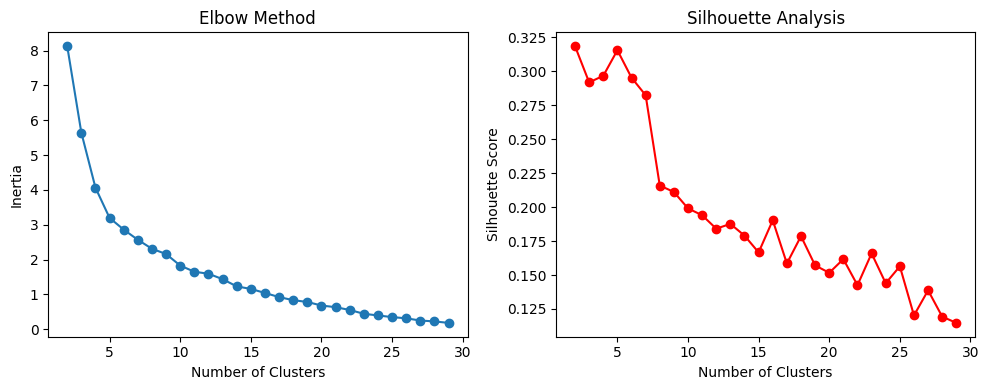

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Finding optimal K using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 30)  # Trying cluster sizes from 2 to 30

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

In [78]:
from sklearn.cluster import KMeans

# Define number of clusters (can be determined using Elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
product_df_scaled['Cluster'] = kmeans.fit_predict(product_df_scaled[feature_cols])

In [79]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
product_df_scaled['Cluster_GMM'] = gmm.fit_predict(product_df_scaled[feature_cols])

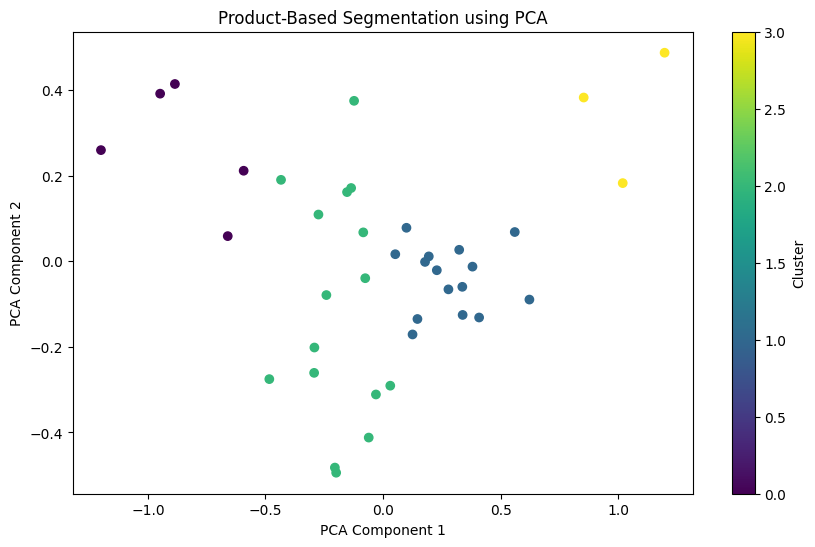

In [80]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(product_df_scaled[feature_cols])
product_df_scaled['PCA1'] = pca_result[:, 0]
product_df_scaled['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10,6))
plt.scatter(product_df_scaled['PCA1'], product_df_scaled['PCA2'], c=product_df_scaled['Cluster'], cmap='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Product-Based Segmentation using PCA")
plt.colorbar(label="Cluster")
plt.show()

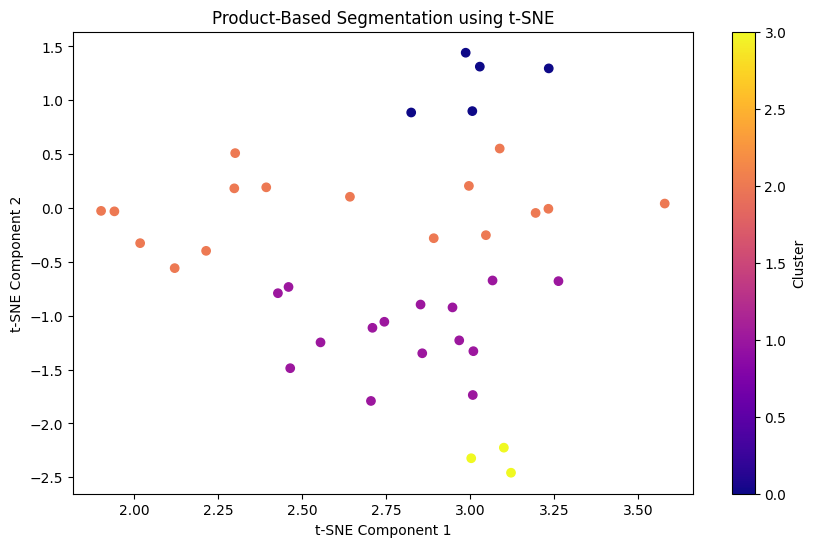

In [81]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(product_df_scaled[feature_cols])
product_df_scaled['TSNE1'] = tsne_result[:, 0]
product_df_scaled['TSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(10,6))
plt.scatter(product_df_scaled['TSNE1'], product_df_scaled['TSNE2'], c=product_df_scaled['Cluster'], cmap='plasma')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Product-Based Segmentation using t-SNE")
plt.colorbar(label="Cluster")
plt.show()

In [82]:
# Get mean values for each cluster
cluster_summary = product_df_scaled.groupby('Cluster')[feature_cols].mean()
print(cluster_summary)

           rating  Visual Appeal  Performance  Service Experience   Comfort  \
Cluster                                                                       
0        0.193536       0.315059     0.423295            0.173270  0.212707   
1        0.652067       0.588196     0.400506            0.587147  0.600495   
2        0.426684       0.473588     0.253517            0.444993  0.499366   
3        1.000000       0.955556     0.747475            0.918301  0.807692   

         Value for Money  Reliability  sentiment_score  
Cluster                                                 
0               0.115444     0.214338         0.180356  
1               0.823608     0.640257         0.520190  
2               0.618265     0.451093         0.307889  
3               0.829787     0.937500         0.847617  


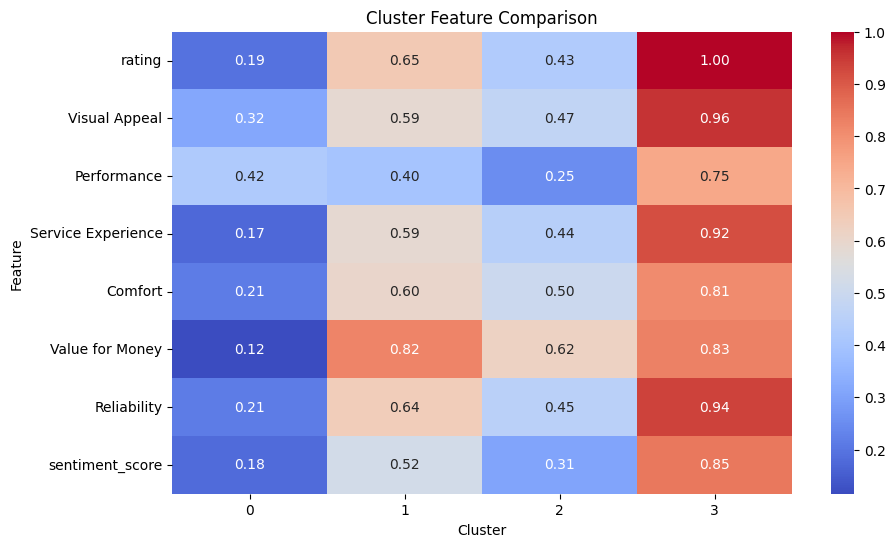

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cluster Feature Comparison")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()